<a href="https://colab.research.google.com/github/EirafWali/Supervised_flooding/blob/main/Supervised_classification_ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML: Flooding Classification


### Introduction

Flooding is considered a hazardous natural disaster that can cause a widespread damage to infrastructure, ecosystems, and human lives. Predicting flood risk accurately is crucial for early warnings and effective disaster management. This notebook focuses on developing and comparing several supervised machine learning models such as the K-Nearest Neighbors (KNN), Logistic Regression, and Decision Tree to predict flood risk intensity based on environmental, climatic, and urbanization factors.
The dataset includes various features such as monsoon intensity, drainage systems, coastal vulnerability, and deforestation. These factors play a critical role in assessing the probability of flooding and the associated risk categories. The notebook explores data preprocessing, visualization, and model evaluation using key metrics like accuracy, precision, recall, and F1 score. To improve model performance, hyperparameter tuning is performed for each model. Lastly, I present a comparison between these three models performances to identify the most reliable and generalizable model for flood risk prediction.


Source: https://www.kaggle.com/datasets/naiyakhalid/flood-prediction-dataset

About the dataset: This dataset contains factors that affect the flooding events and their intensity (natural and human-driven).

### Objective:

Transform the continuous FloodProbability column into categories such as:

Low Risk < 0.5

High Risk >= 0.5

Then, perform supervised ML to predict the risk level of the event based on human-induced and natural factors.

### Methodology:
- Logistic Regression
- KNN
- Decision Tree

### Importance:
- This work gives geoscientists insights into flooding risk intensity and aids in making predictions and forecasting flooding risks. Hence, it can be used in warning systems and hazard prevention.

---

## Section 1: Importing, cleaning, and EDA

In [1]:
# Import the needed libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the data from github for easy access by the public
path = "https://raw.githubusercontent.com/EirafWali/Supervised_flooding/main/flooding%20data.xlsx"

# Read the Excel sheet
df_flood = pd.read_excel(path)

# Check dataset size
print("Dataset size:", df_flood.shape)


Dataset size: (50000, 21)


In [3]:
# Check the header of the dataset
df_flood.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [4]:
# Check the information of the dataset
df_flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [5]:
# Check statistical description
df_flood.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [6]:
# This code box looks into the data and checks if there are any missing values in all the columns.

# looking for missing values and giving the sum in each column
missing_data = df_flood.isnull().sum()
print(missing_data)

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


Note:

Luckily, the Excel sheet containing the data has no missing values in any of the columns and rows.

The data is clean to work with directly.

## Section 2: Visualization

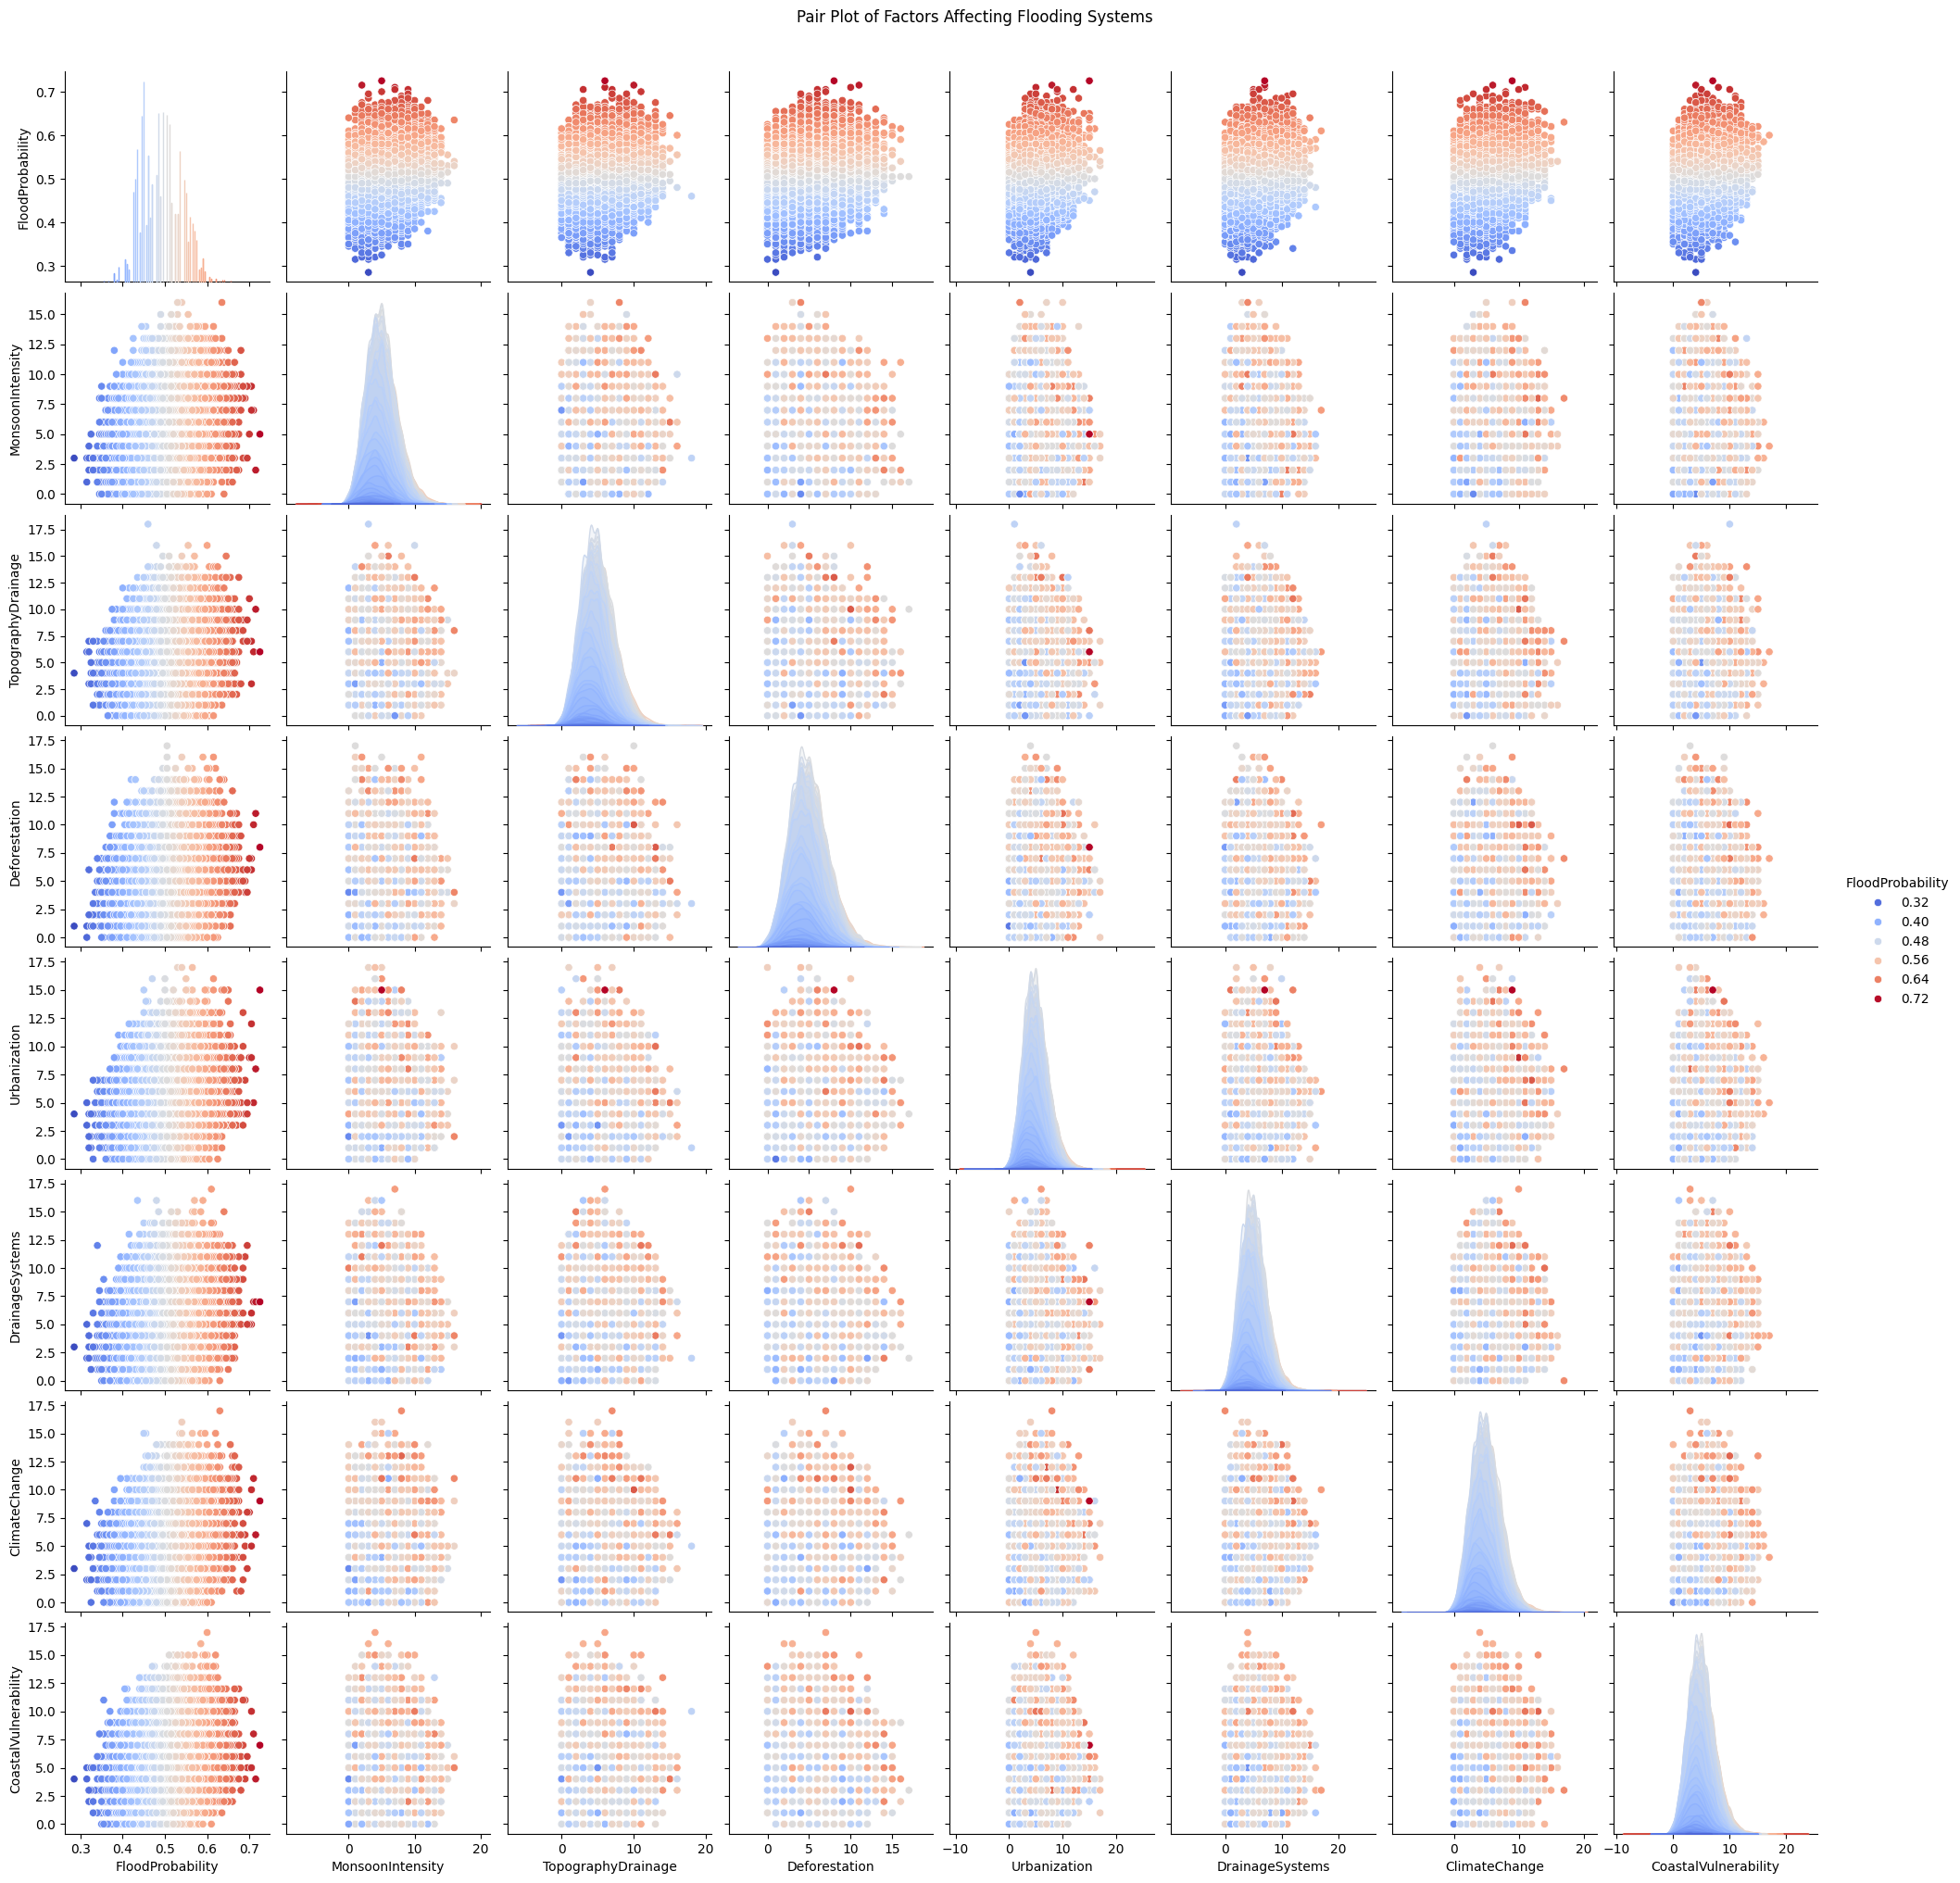

In [ ]:
# In this code box is a Seaborn pair plot using seaborn library to understand the relationships of some of the factors
# Figure 1
# Create the pair plot using seaborn
sns.pairplot(
    df_flood,
    vars=['FloodProbability', 'MonsoonIntensity', 'TopographyDrainage','Deforestation',
          'Urbanization','DrainageSystems','ClimateChange','CoastalVulnerability'],
    hue='FloodProbability',  # Color points by the FloodProbability
    palette='coolwarm'
)

# Add a title to the plot
plt.suptitle("Pair Plot of Factors Affecting Flooding Systems", y=1.02)

# Display the plot
plt.show()

## Figure 1: Pair plot for key factors affecting flooding probabilities.

The pair plot explains how different environmental and human factors can influence the probability of flooding.

The relationship between Monsoon Intensity and Flood Probability shows a positive trend; as monsoon intensity increases, flood risks tend to increase, which indicates that areas with heavy monsoon are more likely to have flooding events, especially if other mitigating factors, such as drainage systems, are insufficient.

Likewise, the Topography Drainage is a key factor in determining flood occurrence, where regions with poor drainage scores are consistently associated with more increased flood probabilities, indicating that adequate water drainage infrastructure is crucial in managing flood risks.

Urbanization and Deforestation also have important effects on flood probability. The pair plot shows that as urbanization increases, flood risks increase as well. This can be explained by the reduced natural water absorption due to urbanization. This pattern is also seen with Deforestation, which reduces the land's capacity to hold water, leading to higher runoff and flood levels.

Lastly, areas with high climate change effects seem to have higher flood probabilities, which can be attributed to shifting rainfall patterns and rising sea levels. Coastal areas with high vulnerability exhibit a similar pattern, indicating that these regions are at considerable risk and require mitigation strategies.

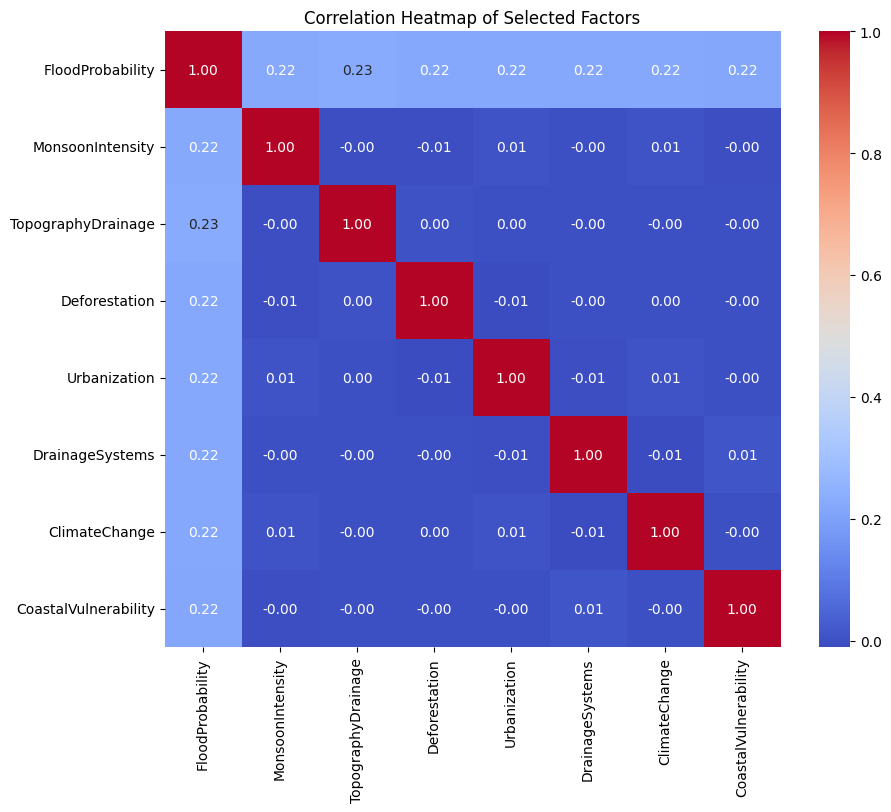

In [3]:
# This code box is to plot a correlation matrix heat map of some of the factors of interest.
# Figure 2:

# Selecting the factors
factors = [
    'FloodProbability',
    'MonsoonIntensity',
    'TopographyDrainage',
    'Deforestation',
    'Urbanization',
    'DrainageSystems',
    'ClimateChange',
    'CoastalVulnerability'
]

# Correlation matrix
correlation_matrix = df_flood[factors].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Selected Factors")

# Display the plot
plt.show()


## Figure 2: Correlation Matrix Heat Map

### Observations:
- Flood Probability shows a weak positive correlation (~0.22-0.23) with key features like monsoon intensity, topography drainage, deforestation, urbanization, and climate change. This suggests that these factors independently contribute to flooding risks but likely have stronger combined or interactive effects.

- Topography drainage stands out with a slightly higher correlation (~0.23) in comparison with the others, suggesting its importance in mitigating or amplifying flood risks.

- The low correlations between individual factors (mostly near zero) suggest that no single factor impacts the other's outcomes.

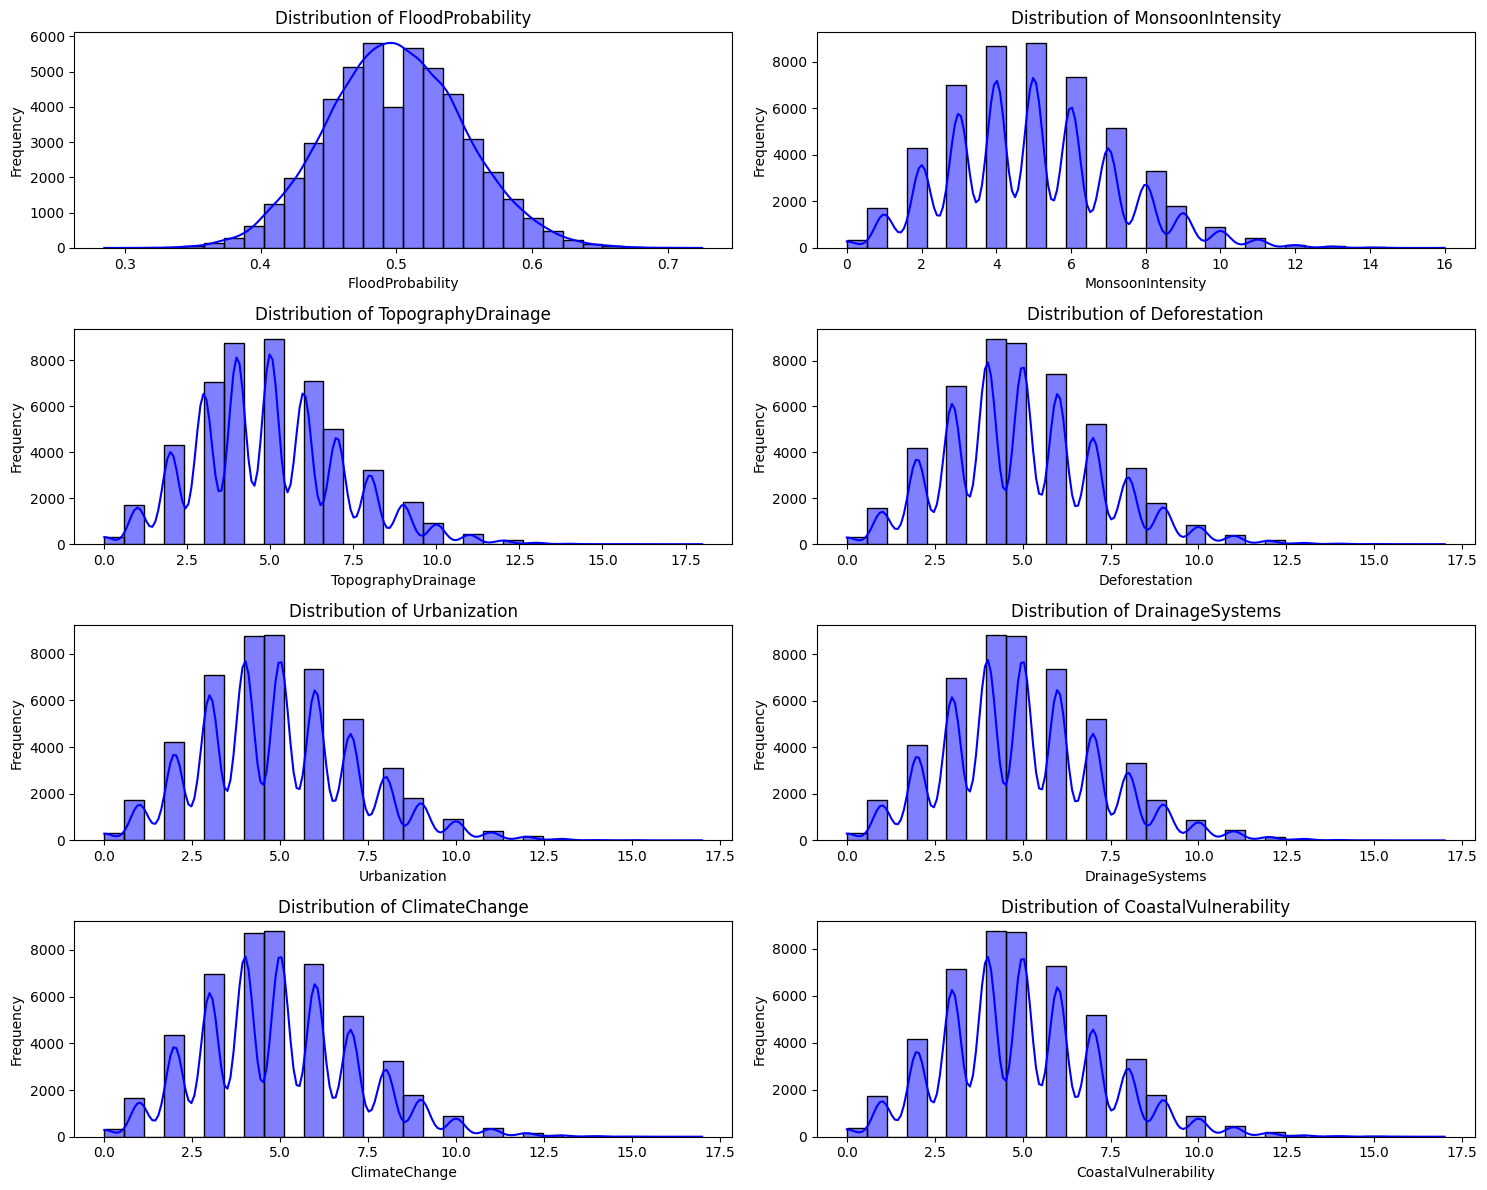

In [4]:
# Figure 3: Distribution plots for selected factors

# Setting up the figure size and layout
plt.figure(figsize=(15, 12))

# Iterate over the chosen factors
for i, factor in enumerate(factors, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df_flood[factor], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

## Figure 3: Distribution plots for selected factors impacting flooding probabilities.


### Observations:
- Flood Probability: The distribution seems to be approximately a normal distribution showing a nearly bell shape, centered around a probability of 0.5, which suggests that the dataset contains a balance between medium flood risks and high flood risks. Extreme low and high flood probabilities are less than the medium ones.

- Monsoon Intensity: The distribution of monsoon intensity shows a concentration of values around mid-levels (4-6), indicating that most areas in the dataset experience moderate monsoon conditions. There are relatively fewer observations of extreme monsoon intensity (above 10), which may represent regions with unusually heavy rainfall. This information matches what is seen from the flood probabilities histogram.

- Topography Drainage: Topography drainage values are spread across a wide range of values. This suggests variability in terrain and drainage quality across the dataset. Areas with poor drainage (lower values) could potentially have a higher flood risk, but this would need to be confirmed through further analysis.

- Deforestation and Urbanization: Both have similar distributions, indicating varying levels of development and land-use impact across the dataset.

- Drainage Systems, Climate Change, Coastal Vulnerability: These are similarly centered around mid-level values, indicating widespread moderate risks but with the presence of some extreme cases.

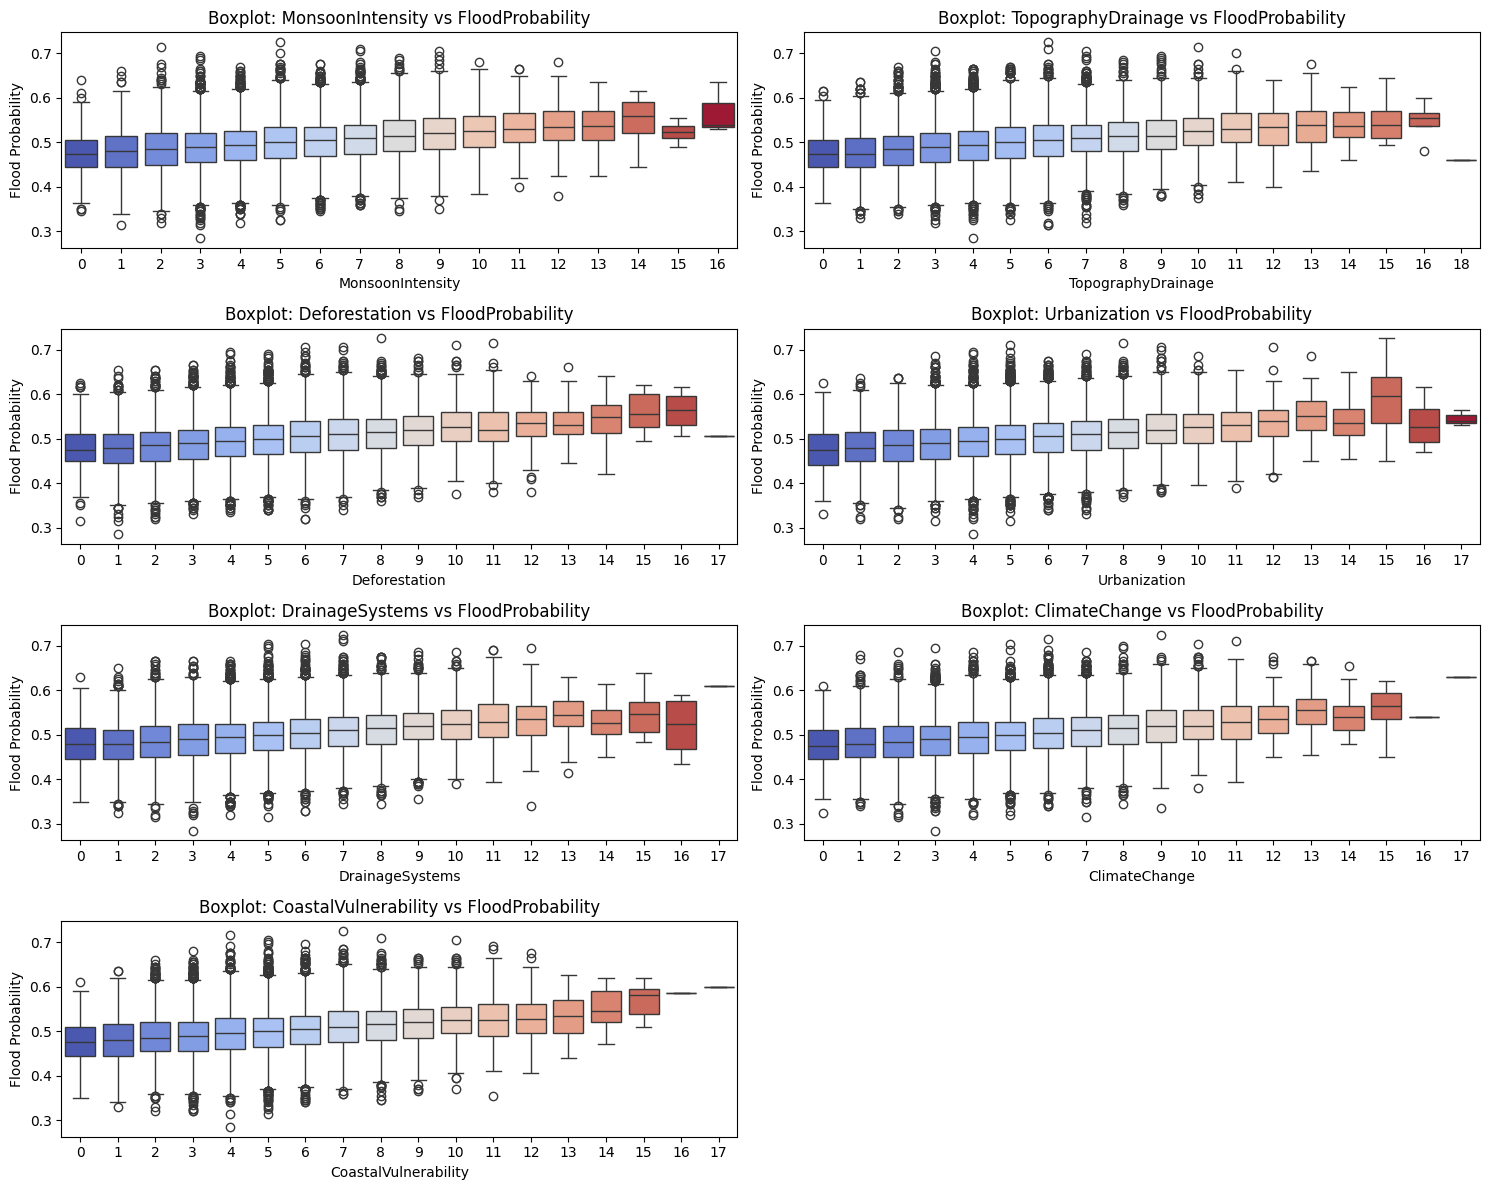

In [ ]:
#Figure 4: Box plot for the selected factors vs Flood Probability

# Initialize the figure and size
plt.figure(figsize=(15, 12))

# Loop through selected factors
for i, factor in enumerate(factors[1:], 1):  # Skip 'FloodProbability'
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_flood[factor], y=df_flood['FloodProbability'],hue=df_flood[factor], palette='coolwarm', legend= False)
    # Set the title and labels
    plt.title(f'Boxplot: {factor} vs FloodProbability')
    plt.xlabel(factor)
    plt.ylabel('Flood Probability')

# Display the plots
plt.tight_layout()
plt.show()

## Figure 4: Box plots for the selected factors vs FloodProbability


### Observations:

- Monsoon Intensity vs Flood Probability:
 - The flood probability tends to increase with higher monsoon intensity levels. The variability within each monsoon category shows the presence of some regions experiencing outliers, likely due to interactions with other factors.

- Topography Drainage vs Flood Probability:
 - As the topography drainage level increases, the median flood probability increases, but there is broad variability within each drainage level. This suggests that drainage alone is not sufficient to determine flood risk, and other factors could be interacting.

- Deforestation vs Flood Probability:
 - Higher levels of deforestation show a slight trend of increasing flood probability.

- Urbanization vs Flood Probability:
 - Higher urbanization levels show increasing flood probability.

- Drainage Systems vs Flood Probability:
 - The median flood probability slightly increas with higher level drainage systems, but the overall relationship appears weak.

 - Climate Change vs Flood Probability:
 - As the impact of climate change increases, there is a slight increase in flood probability.

 - Coastal Vulnerability vs Flood Probability:
 - Higher coastal vulnerability shows higher median flood probability, as expected. Regions with greater coastal exposure are at higher risk due to sea-level rise and storms.

## Section 3: Pre-processing, Splitting, and Scaling

For this study, I need to convert the continuous Flood Probability column into categorical classes (low and high risks) to be able to  perform classification supervised machine learning modeling.

The classes are going to be divided as follows:
- Low Risk: Probability ≤ 0.5
- High Risk: Probability > 0.5

In [7]:
# This code converts the probability column to categorical risk labels (high, low)

# Creating a function to use Flood Probability values and give a categorical risk label
def classify_flood_risk(probability):
    # If the probability is 0.5 or below, classify it as 'Low Risk'
    if probability <= 0.5:
        return 'Low Risk'
    # If the probability is greater than 0.5, classify it as 'High Risk'
    else:
        return 'High Risk'

# Apply the classification function to the 'FloodProbability' column
df_flood['RiskCategory'] = df_flood['FloodProbability'].apply(classify_flood_risk)

# Count the total number of events in each risk category
class_distribution = df_flood['RiskCategory'].value_counts()

# Display the distribution of flood risk categories
class_distribution

,count
RiskCategory,
Low Risk,26505
High Risk,23495


## Data Splitting

From the dataset, I can see that the data may inherently have temporal and spatial components affecting flooding risks, Howeverm I do not have explicit columns dedicated for time or location. Without this information, it is challenging to perform a split that accurately preserves the temporal or spatial structure. Hence, trying a temporal or spatial split is not possible in this dataset and can raise some issues if I attempt to make random divisions, potentially reducing model performance or misrepresenting real-world patterns.
Having said that, I understand the need for time and geographical data in future work, as for now, I will proceed with performing a stratified split. The stratified split ensures that the distribution of the target variables ( High Risk and Low Risk) will remain consistent in both the training and test sets, preventing class imbalance issues. While this approach may not fully address potential temporal or spatial dependencies, it ensures that the model is trained and tested on data with a representative class distribution. This is a practical compromise, given the available information, and will still allow for effective model training and evaluation in this context.

In [8]:
# This code is to split the data using the stratified method for splitting.

# Remove the target related columns to select the features and avoid data leakage
features = df_flood.drop(columns=['FloodProbability', 'RiskCategory'])

# Select the target to classify it
target = df_flood['RiskCategory']

# Perform stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

# Check on the class distribution in the test and training sets
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))


Training Set Class Distribution:
RiskCategory
Low Risk     0.5301
High Risk    0.4699
Name: proportion, dtype: float64

Test Set Class Distribution:
RiskCategory
Low Risk     0.5301
High Risk    0.4699
Name: proportion, dtype: float64


In [9]:
# Check for overlapping rows in the train and test sets
overlap = pd.merge(X_train, X_test, how='inner')
print("Number of overlapping samples:", len(overlap))

Number of overlapping samples: 0


After splitting, I will scale the data separately to avoid data leakage between the training and test sets.

## Scaling

In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training and test sets
X_train_scaled = scaler.fit_transform(X_train[features.columns])
X_test_scaled = scaler.transform(X_test[features.columns])

# Check the mean and standard deviation of the scaled data
train_scaled_mean = X_train_scaled.mean(axis=0)
train_scaled_std = X_train_scaled.std(axis=0)

print("Mean of Scaled Training Data:", train_scaled_mean)
print("Standard Deviation of Scaled Training Data:", train_scaled_std)


Mean of Scaled Training Data: [-2.06057393e-17  1.45661261e-16 -1.75859327e-17  2.12452278e-16
  1.60937930e-16  1.08713039e-16 -1.47437618e-16  1.65201186e-16
  1.29318778e-16 -1.28608235e-16 -8.81072992e-17  1.91668903e-16
  1.57385216e-16 -1.32516220e-16  4.61852778e-17  1.28608235e-16
 -5.68434189e-17  1.47792889e-16 -2.73558953e-17  6.90114632e-17]
Standard Deviation of Scaled Training Data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Note:
The mean of the scaled data features is close to 0, this confirms that the scaling was performed correctly.

Also, the standard deviation is 1 for all features, meaning that the data has been standardized properly.

## Section 4: KNN Modeling

In the following code block I perform the KNN without any hyperparameters tuning to see the results.

In [11]:
# KNN Model code without tuning hyperparameters

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make the predictions on the test set
knn_predictions = knn.predict(X_test_scaled)

# Evaluate the predictions using scoring metrics (accuracy, recall, precision, f1)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, pos_label='High Risk')
knn_recall = recall_score(y_test, knn_predictions, pos_label='High Risk')
knn_f1 = f1_score(y_test, knn_predictions, pos_label='High Risk')

# Print the results
knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}

knn_results


{'Model': 'KNN',
 'Accuracy': 0.8507,
 'Precision': 0.8928921568627451,
 'Recall': 0.7752713343264525,
 'F1 Score': 0.8299350723317006}

### Note:
In the following code block, I perform hyperparameters tuning by testing different neighbors numbers to see the best neighbors value for the model, I also test both weights (distance and uniform) to see the one that results to a better prediction model.

In [12]:
# KNN Model code with tuning hyperparameters

# Hyperparameters to tune
n_neighbors_values = [3, 5, 7, 9, 11]  # Test different numbers of neighbors
weights_values = ['uniform', 'distance']  # Test both uniform and distance based weights

# Store the best model and corresponding metrics
best_model = None
best_f1_score = 0  # To track the highest F1-score to see the best parameters
best_params = {}

# Loop over all combinations of hyperparameters
for n_neighbors in n_neighbors_values:
    for weights in weights_values:
        # Initialize the KNN classifier with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

        # Train the model on the training data
        knn.fit(X_train_scaled, y_train)

        # Make the predictions on the test set
        knn_predictions = knn.predict(X_test_scaled)

        # Calculate the F1-score as the primary evaluation metric
        current_f1_score = f1_score(y_test, knn_predictions, pos_label='High Risk')

        # If the current model has a better F1-score, update the best model
        if current_f1_score > best_f1_score:
            best_model = knn
            best_f1_score = current_f1_score
            best_params = {'n_neighbors': n_neighbors, 'weights': weights}

# Evaluate the best model on the test set using all the metrics
best_knn_predictions = best_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, best_knn_predictions)
knn_precision = precision_score(y_test, best_knn_predictions, pos_label='High Risk')
knn_recall = recall_score(y_test, best_knn_predictions, pos_label='High Risk')
knn_f1 = f1_score(y_test, best_knn_predictions, pos_label='High Risk')

# Store and print the results of the best model
knn_results = {
    'Best n_neighbors': best_params['n_neighbors'],
    'Best weights': best_params['weights'],
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}

# Print the results of the best model
knn_results

{'Best n_neighbors': 11,
 'Best weights': 'uniform',
 'Accuracy': 0.8736,
 'Precision': 0.9375796178343949,
 'Recall': 0.7831453500744839,
 'F1 Score': 0.8534322820037106}

The next code is for plotting the results of the hyperparameters tuning model to visualize it in a confusion matrix and to visualize the scoring methods as a bar plot.

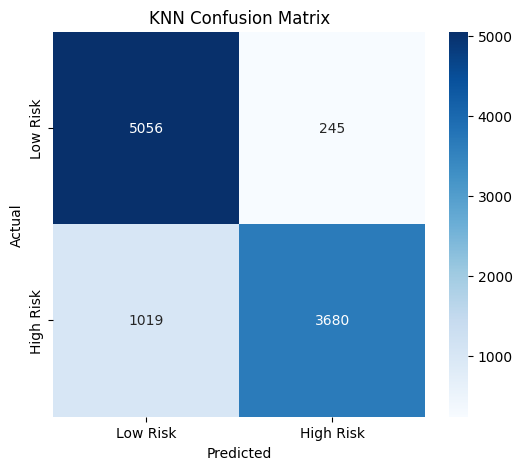

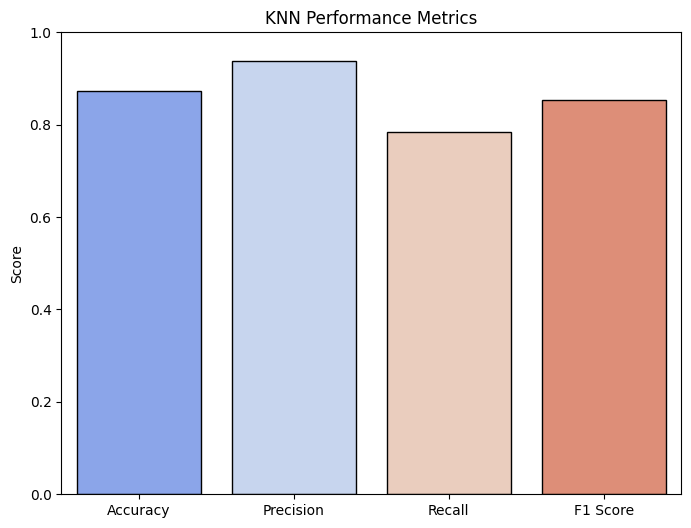

In [13]:
# Visualizing the results by a bar plot for the scoring metrics and a confusion matrix

# Figure 5: Confusion matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, best_knn_predictions, labels=['Low Risk', 'High Risk'])

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])

# Add title and axis labels
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the confusion matrix plot
plt.show()


# Figure 6: Bar plot of the performance metrics
# Generate the bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [knn_accuracy, knn_precision, knn_recall, knn_f1]

# initialize the plot
plt.figure(figsize=(8, 6))

# Plot the bar chart
sns.barplot(x=metrics, y=values, hue=metrics, palette='coolwarm', edgecolor='black', dodge=False, legend=False)

# Add title and labels
plt.title('KNN Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Display the plot
plt.show()


## Explanation of the results: (KNN)


## Figure 5:  KNN Confusion Matrix

From the confusion matrix, we can see that the model correctly predicted 5056 low risk classes and 3680 high risk classes. it predicted 245 false positives where it should be low risk but was predicted as high risk. Also, it had predected 1019 false negatives, where it classified high risk cases as low risks.

## Figure 6: Bar Plot of KNN Performance Metrics

From the bar plot, we can see that the accuracy is approximately 87%; this indicates a good performance of the model overall. It seems like the precision is high, being approximately 94%. This means the model is doing a good job of predicting the high risk class and avoiding false positives. The recall score is approximately 78%. This is a moderately high score, indicating that the model is correctly identifying the actual high risk class. However, it missed some cases. The F1 score is high, being approximately 85%, shows that the model overall did a good job.



### Note:

As we saw from section 3, considering tuning hyperparameters leads to better results in the model. This is also seen from the scoring metrics being overall higher in accuracy, recall, percision, and f1 scores after tuning the hyperparameters.
Moving forward in the notebook, hyperparameters tuning will be performed on all coming modeling sections.

---
## Section 4: Logistic Regression Model


{'Best C Value': 0.1, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}


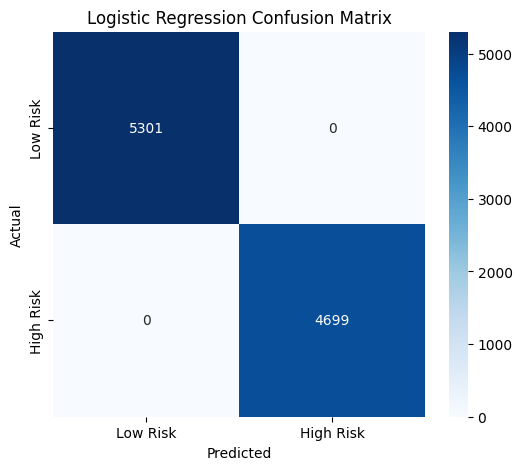

In [14]:
# This code is to perform the logistic regression model, score it, and plot a confusion matrix

# Hyperparameter values to test for the regularization strength
C_values = [0.1, 1, 10]  # Test different levels of regularization

best_model = None
best_f1_score = 0   # To track the highest F1-score to see the best parameters
best_C = 0

# Loop over all C values
for C in C_values:
    # Initialize the Logistic Regression model with current C and a fixed penalty
    logistic_model = LogisticRegression(C=C, penalty='l2', solver='lbfgs', max_iter=200)

    # Train the model
    logistic_model.fit(X_train_scaled, y_train)

    # Make the predictions
    log_reg_predictions = logistic_model.predict(X_test_scaled)

    # Evaluate using F1-score as the primary metric
    current_f1 = f1_score(y_test, log_reg_predictions, pos_label='High Risk')

    #  Define  best model
    if current_f1 > best_f1_score:
        best_f1_score = current_f1
        best_model = logistic_model
        best_C = C

# Evaluate the best model on all metrics
best_predictions = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, best_predictions)
precision = precision_score(y_test, best_predictions, pos_label='High Risk')
recall = recall_score(y_test, best_predictions, pos_label='High Risk')
f1 = f1_score(y_test, best_predictions, pos_label='High Risk')

# Display results
log_reg_results = {
    'Best C Value': best_C,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

print(log_reg_results)

# Figure 7: Confusion matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, log_reg_predictions, labels=['Low Risk', 'High Risk'])

# Plot the figure
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])

# Add title and labels
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
## Explanation of the results: (KNN)
plt.show()

## Explanation of the results: (Logistic Regression Model)

The results show that all scoring metrics have a value of 1, meaning that the model correctly classified all cases with zero false positives or false negatives.

## Figure 7: Confusion Matrix

The confusion matrix shows that the model perfectly classified all samples of low and high risks. It precisely predicted 5301 low risk cases as Low Risk (true negatives) and 4699 high risk cases as high risk (true positives). The matrix shows that the model made zero mistakes, where we can see that there were zero false positives and zero false negatives

### Note:
These results of a highly accurate model can indicate a sign of overfitting or data leakage.




---
## Section 5:  Decision Tree Classification Model


{'Accuracy': 0.7018, 'Precision': 0.6772661573404914, 'Recall': 0.6980208555011704, 'F1 Score': 0.6874869000209599}
{'max_depth': None, 'min_samples_split': 15, 'min_samples_leaf': 5, 'criterion': 'entropy'}


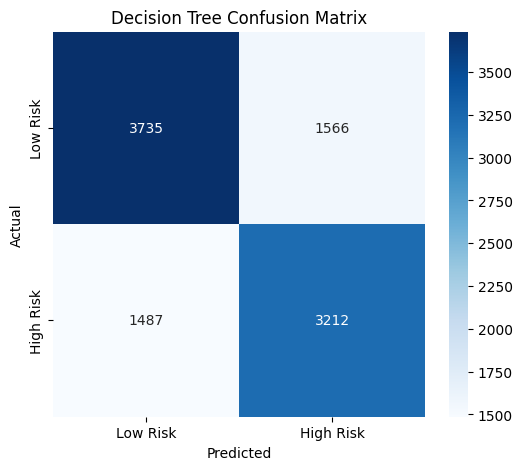

In [15]:
# This code is to perform the Decision Tree model, score it, and plot a confusion matrix


# Hyperparameter values for the tests
max_depth_values = [3, 5, 10, None]
min_samples_split_values = [2, 5, 15]
min_samples_leaf_values = [1, 5, 10]
criteria = ['gini', 'entropy']

best_model = None
best_f1_score = 0  # To track the highest F1-score to see the best parameters
best_params = {}

# Loop over all combinations of different hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for criterion in criteria:
                # Initialize the Decision Tree with the current hyperparameters
                tree = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    criterion=criterion,
                    random_state=42
                )

                # Train the model
                tree.fit(X_train_scaled, y_train)

                # Make the predictions
                tree_predictions = tree.predict(X_test_scaled)

                # Evaluate using F1-score as the primary metric
                current_f1 = f1_score(y_test, tree_predictions, pos_label='High Risk')

                # Identify the best model
                if current_f1 > best_f1_score:
                    best_f1_score = current_f1
                    best_model = tree
                    best_params = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'criterion': criterion
                    }

# Evaluate the best model on all the metrics
best_predictions = best_model.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, best_predictions)
tree_precision = precision_score(y_test, best_predictions, pos_label='High Risk')
tree_recall = recall_score(y_test, best_predictions, pos_label='High Risk')
tree_f1 = f1_score(y_test, best_predictions, pos_label='High Risk')

# Display results
decision_tree_results = {
    'Accuracy': tree_accuracy,
    'Precision': tree_precision,
    'Recall': tree_recall,
    'F1 Score': tree_f1
}
print(decision_tree_results)
print(best_params)


# Figure 8: Confusion matrix for the Decision Tree model

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, tree_predictions, labels=['Low Risk', 'High Risk'])

# Plot the figure
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])

# Add labels and title
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


## Explanation of the results: ( Decision Tree Model)

After multiple iterations with different min_sample_split and min_samples_leaf  ranges, the decision tree with min_samples_split = 15 and min_samples_leaf = 5 achieved the best accuracy (70.18%), but precision (67.73%), recall (69.80%), and the F1 score (68.75%) remain closely balanced in all iterations. This is indicating consistent performance across metrics. The increased min_samples_split (15) reduced the unnecessary splits, which likely contributed to the improved generalization compared to other min_samples_split values that I have tried. The model benefits from no depth restriction (max_depth=None), allowing it to capture complex patterns, while entropy is effective at identifying optimal splits in this dataset. The stability of these results suggests that the current configuration is reducing overfitting without underfitting.


## Figure 8: Confusion matrix for the Decision Tree model
The confusion matrix demonstrates that the model precisely classified 3735 low risk cases and 3212 high risk cases. However, it also made 1566 false positive predictions, meaning it incorrectly labeled a large number of low risk cases as high risk. Additionally, the model missed 1487 actual high risk cases and predicting them as low risk which is a false negative case that can lead to unfurtunate real-world results.


## Section 6: Comparison Between the Three Models

In [16]:
# This code is for comparing the three modeling methods.

knn_results = {
    'Model': 'KNN',
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1
}

log_reg_results = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy,  # Best accuracy from logistic regression
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

decision_tree_results = {
    'Model': 'Decision Tree',
    'Accuracy': tree_accuracy,  # Best accuracy from decision tree
    'Precision': tree_precision,
    'Recall': tree_recall,
    'F1 Score': tree_f1
}

# Create a dataframe with the results from all models
comparison_df = pd.DataFrame([knn_results, log_reg_results, decision_tree_results])

# Display the dataframe
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN    0.8736   0.937580  0.783145  0.853432
1  Logistic Regression    1.0000   1.000000  1.000000  1.000000
2        Decision Tree    0.7018   0.677266  0.698021  0.687487


## Results and Comparison Conclusion

The Three models performances show a significant variation that highlights potential concerns on the overfitting or data leakage possibilty. The KNN model performed relatively well with an accuracy of 87.36% and a high F1 score of 85.34%, indicating its ability to balance precision (93.76%) and recall (78.31%) effectively. However, the Logistic Regression model achieved perfect scores across all metrics (accuracy, precision, recall, and F1 score at 100%), which is highly unusual and strongly suggests overfitting or data leakage, as real-world scenarios rarely produce perfect predictions. In contrast, the Decision Tree model delivered more realistic and balanced results with an accuracy of 70.18%, F1 score of 68.75%, and fairly consistent precision of 67.72% and recall of 69.80%, indicating that it successfully avoided extreme overfitting but still has room for improvement.

Based on these results, the Decision Tree model seems to be the most reliable and realistic method. While Logistic Regression achieved perfect scores, this is likely due to overfitting or data leakage, making it unreliable for generalization. The KNN model performed well with a high accuracy (87.36%) and F1 score (85.34%), but its relatively lower recall (78.31%) suggests that it may miss a significant number of high-risk cases, which could be problematic in critical applications like flood risk prediction. The Decision Tree's accuracy (70.18%) and F1 score (68.75%) reflect a more balanced performance without extreme overfitting, and it likely generalizes better to unseen data. Therefore, while KNN shows strong potential, the Decision Tree is the most reliable based on these results.




## Assignment Questions


#### Which method did you like the most?

I liked the Decision Tree the best because it provided a realistic and balanced performance with an F1 score of 68.75% and no signs of overfitting. The Logistic Regression results, despite being perfect, are unreliable due to likely data leakage or overfitting. KNN performed well but had a lower recall, which could be risky for applications where correctly identifying high-risk cases is critical. The Decision Tree offers a solid foundation and can be further enhanced through ensemble techniques.

Other than its good results, it is easier in terms of that it does not need to scale the dataset as it can handle non-linear relationships and feature interactions. I think it worked the best and accounted for the different factors interactions. Having said that, I still did use the scaled data to be consistent with the other models workflows and used dataset.

#### Which method did you like the least?

I liked Logistic Regression the least because its perfect performance (100% accuracy, precision, recall, and F1 score) is most likely due to overfitting or data leakage during the model. The confusion matrix showed no misclassifications, which is highly unusual and raises concerns about the model's ability to generalize to new data. Additionally, Logistic Regression assumes linear relationships between features and the target, which may not fully capture the complex interactions involved in flood prediction, such as how monsoon intensity and urbanization interact for one example. Therefore, it would be my least preferred choice without further investigation into the cause of its perfect performance.


#### How did you score these supervised models?  

I evaluated the supervised models using four key metrics, which are the  accuracy, precision, recall, and F1 score, in addition to generating confusion matrix for detailed performance breakdowns. I found that the confusion matrix helped me the most as it was visual and straight forward and it plots the total number, hence, giving me a sense of the volume of the classified data.


#### Did the output align with your geologic understanding?

Yes, the output of the models somewhat aligns with the geologic and environmental understanding of flood risks, but there are key areas where improvements can be made to fully capture complex geologic interactions. The models correctly identified major trends, such as how monsoon intensity, deforestation, topography drainage, and urbanization influence flood probability which aligned with the expecttions.
 For instance, high risk regions were generally linked to regions with low level drainage and high monsoon activities, which agrees with the geologic understanding that inadequate water absorption and heavy rainfall are major flood contributors.



#### Did you hyperparameter tune? Why or why not?

Yes, I performed hyperparameter tuning for all the models to optimize their performance and address potential overfitting or underfitting. For KNN, I tuned n_neighbors to control how many neighbors influence the classification and also used the weights to determine whether all neighbors contribute equally or closer ones have more influence. For Logistic Regression, I tried to adjust the regularization parameter C with different values where I have experemented large and small numbers to prevent overfitting and improve generalization. However, it seemed like this model was facing an issue of overfitting or data leakage. For the Decision Tree model, I have tried to tune max_depth to limit tree growth, min_samples_split to control when the splits occur, and min_samples_leaf to avoid very small leaf nodes. These parameters were essential in preventing over complex trees and improving generalization to unseen data. Overall, hyperparameter tuning was essential to ensure each model performed optimally while avoiding overfitting.

#### How did you split your data? and why does that make sense for this dataset?

I decided to clasify my data as high and low risk first then used the stratified train-test split to divide the dataset to 80% training dataset and 20% test dataset while keeping the original class distribution of low risk and high risk categories that I have created beforehand. The stratification ensures that both the training and test sets have a similar proportion of each risk classification, which helps in preventing imbalanced splitting that could affect the model performance or evaluation.

As for the temporal and spatial autocorrelation, I can see that the data may inherently have temporal and spatial components affecting flooding risks within its dataset, However, I do not have explicit columns dedicated for time or location. Without this information, it is challenging to perform a split that accurately preserves the temporal or spatial structure. Hence, trying a temporal or spatial split is not possible in this dataset and can raise some issues if I attempt to make random divisions, potentially reducing model performance or misrepresenting real-world patterns. Hence, the stratified splitting method was the ideal in this case. I think that this method makes sense for this dataset because the flood risk classes are somewhat imbalanced, with the majority of samples falling under the low risk category ~53% and fewer samples classified as high risk ~47%. I understand that  without stratification, random splitting could result in a test set that is dominated by one class over the other making the model evaluation unreliable.

#### What did you want to learn more about?


In the first pass, my answer was that I wanted to experiment with hyperparameter tuning. In my final pass, I experimented with different hyperparameters and different ranges of values. I still think there is more room for better ranges for the hyperparameters. Also, I thought I could account for the temporal and spatial autocorrelation. However, I realized that I do not have columns dedicated to these data types, and this information can be inherited in my dataset, which showed me the value of domain knowledge in this case. I am still wondering and would like to know why the logistic regression model had data leakage between the test and train sets but not the other types of models.

#### Did you pre-process your data?

Yes, I pre-processed the data to make sure it was clean and ready for training. First, I created the target variable (RiskCategory) by categorizing the continuous (FloodProbability) into two classes: low Rrisk and high risk, which made the dataset suitable for classification. I then performed a stratified train-test split to maintain the balance of risk classes in both the training and test sets, ensuring that model evaluation would not be biased due to imbalanced data. I also did scaling for the dataset as the KNN and Logistic Regression models are sensitive to feature magnitudes. Additionaly, I removed the Flood Probability and Risk Category data from the dataset before the training to avoid data leakage.

#### Do all models require pre-processing?
In my opinion, yes, all models would need pre-processing. However, not all models require the same amount of pre-processing. Cleaning the data and ensuring that there are no missing values is important for all models. Also, removing the target columns from the dataset is important in all models to prevent data leakage. Scaling, on the other hand, is not required for all models, as some models, like the decision tree, don't get affected by feature magnitude.